In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = "../datasets/StudentsPerformance_modified.csv"
df = pd.read_csv(file_path)

In [3]:
df.shape

(1000, 8)

In [4]:
print(list(df.columns))

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [6]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0
999,female,group D,some college,free/reduced,none,77,86.0,86.0


In [7]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [9]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [10]:
education_df = df["parental level of education"].value_counts().reset_index()
education_df.columns = ["parental level of education", "count"]
education_df

,parental level of education,count
0,some college,226
1,associate's degree,222
2,high school,196
3,some high school,179
4,bachelor's degree,118
5,master's degree,59


In [11]:
null_values = df.isnull().sum()
null_df = pd.DataFrame(null_values).reset_index()
null_df.columns = ["Features", "Count"]
null_df

,Features,Count
0,gender,0
1,race/ethnicity,0
2,parental level of education,0
3,lunch,0
4,test preparation course,0
5,math score,8
6,reading score,6
7,writing score,9


In [12]:
non_null_values = df.notnull().sum()
non_null_df = pd.DataFrame(non_null_values).reset_index()
non_null_df.columns = ["Features", "Count"]
non_null_df

,Features,Count
0,gender,1000
1,race/ethnicity,1000
2,parental level of education,1000
3,lunch,1000
4,test preparation course,1000
5,math score,992
6,reading score,994
7,writing score,991


Text(0, 0.5, 'Count')

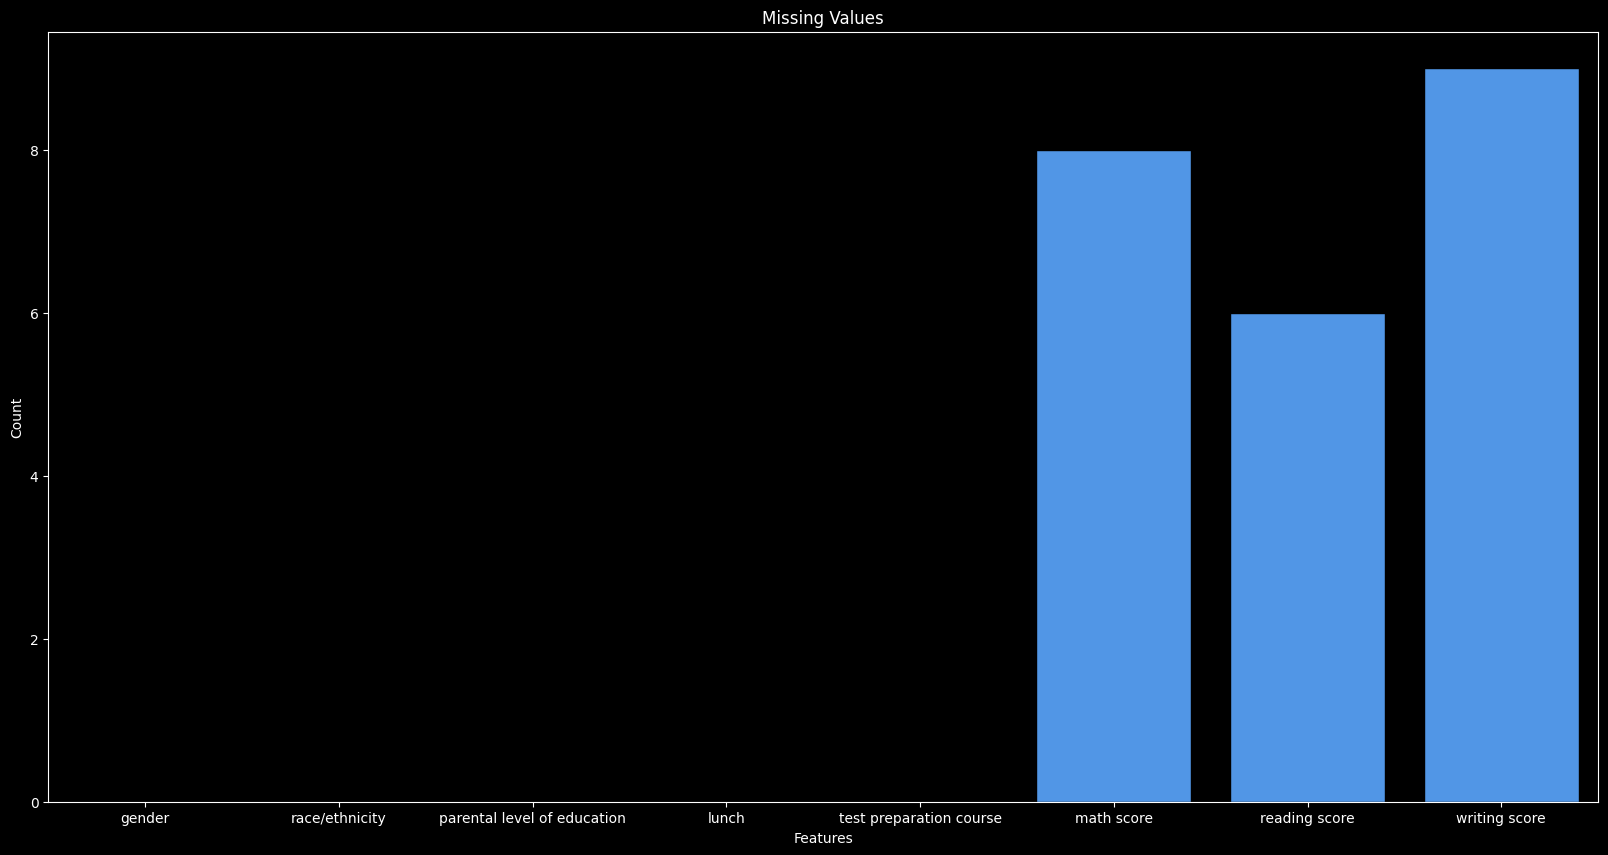

In [13]:
plt.figure(figsize=(20, 10))
sns.barplot(x=null_values.index, y=null_values, color="#3894FF", edgecolor="black")
plt.title("Missing Values")
plt.xlabel("Features")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

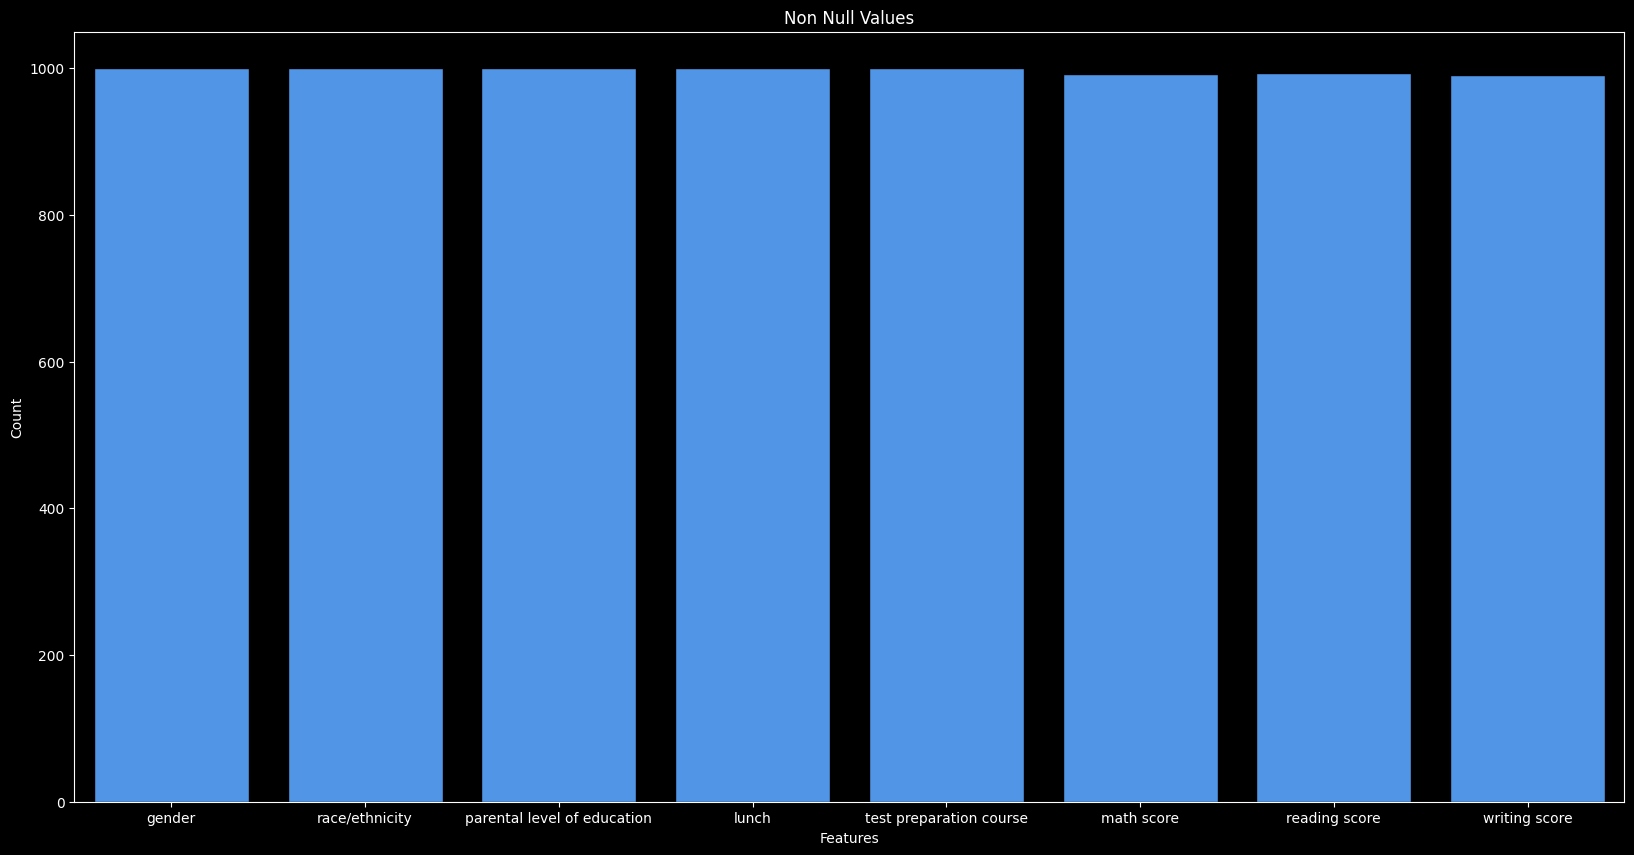

In [14]:
plt.figure(figsize=(20, 10))
sns.barplot(
    x=non_null_values.index, y=non_null_values, color="#3894FF", edgecolor="black"
)
plt.title("Non Null Values")
plt.xlabel("Features")
plt.ylabel("Count")

In [15]:
df["math score"].value_counts().reset_index()

,math score,count
0,65,35
1,?,35
2,62,33
3,59,31
4,69,29
...,...,...
80,123,1
81,24,1
82,28,1
83,0,1


In [16]:
df["math score"] = pd.to_numeric(df["math score"], errors="coerce")

In [17]:
df["math score"].value_counts().reset_index()

,math score,count
0,65.0,35
1,62.0,33
2,59.0,31
3,69.0,29
4,68.0,26
...,...,...
79,0.0,1
80,22.0,1
81,19.0,1
82,23.0,1


In [18]:
mean_math_score = int(
    df[(df["math score"] > 0) & (df["math score"] < 100)]["math score"].mean()
)
mean_math_score

65

In [19]:
df["math score"] = df["math score"].fillna(mean_math_score).astype(int)

In [20]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  6
writing score                  9
dtype: int64

In [21]:
df["math score"].mean()

np.float64(66.267)

In [22]:
print(df["reading score"].min(), df["reading score"].max())

3.0 100.0


In [23]:
print(df["reading score"].median())

69.5


In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df[["reading score"]] = imputer.fit_transform(df[["reading score"]]).astype(int)

In [25]:
print(df["reading score"].median())

69.0


In [26]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  9
dtype: int64

In [27]:
print(df["writing score"].min(), df["writing score"].max())

10.0 567.0


In [ ]:
mode_writing_score = int(
    df[(df["writing score"] > 0) & (df["writing score"] < 100)]["writing score"]
    .mode()
    .mean()
)
mode_writing_score

74

In [29]:
df["writing score"] = df["writing score"].fillna(mode_writing_score).astype(int)

In [30]:
print(df["writing score"].mode())

0    74
Name: writing score, dtype: int64


In [31]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [32]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [33]:
numeric_df = df.select_dtypes(include=["int64"])

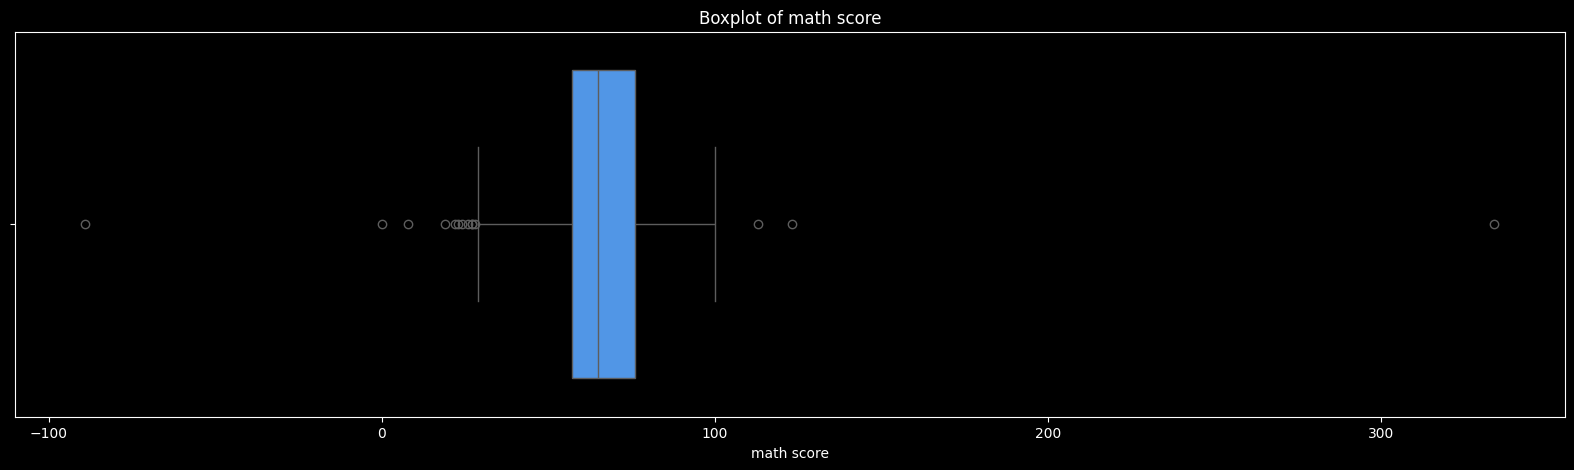

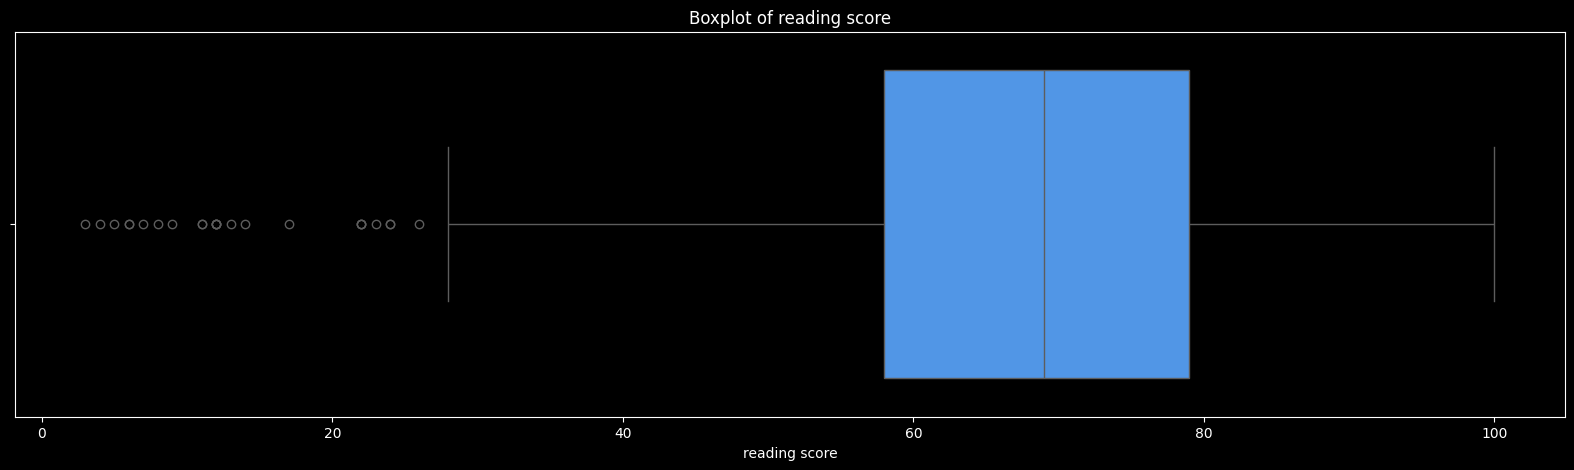

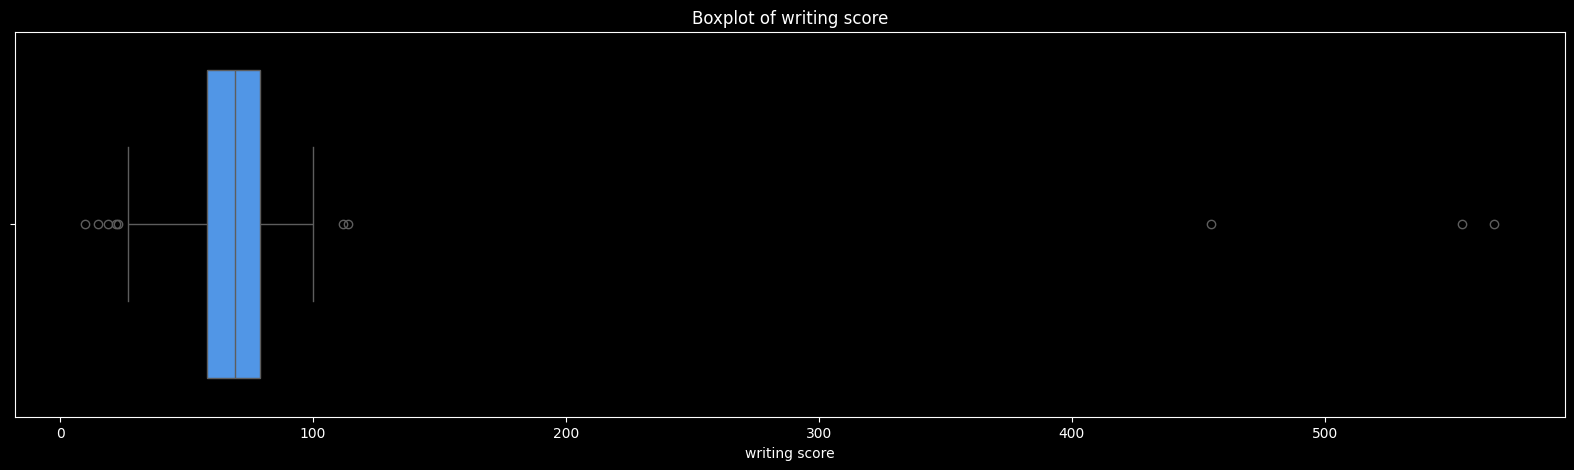

In [34]:
for col in numeric_df:
    plt.figure(figsize=(20, 5))
    sns.boxplot(x=df[col], color="#3894FF")
    plt.title(f"Boxplot of {col}")
    plt.show()

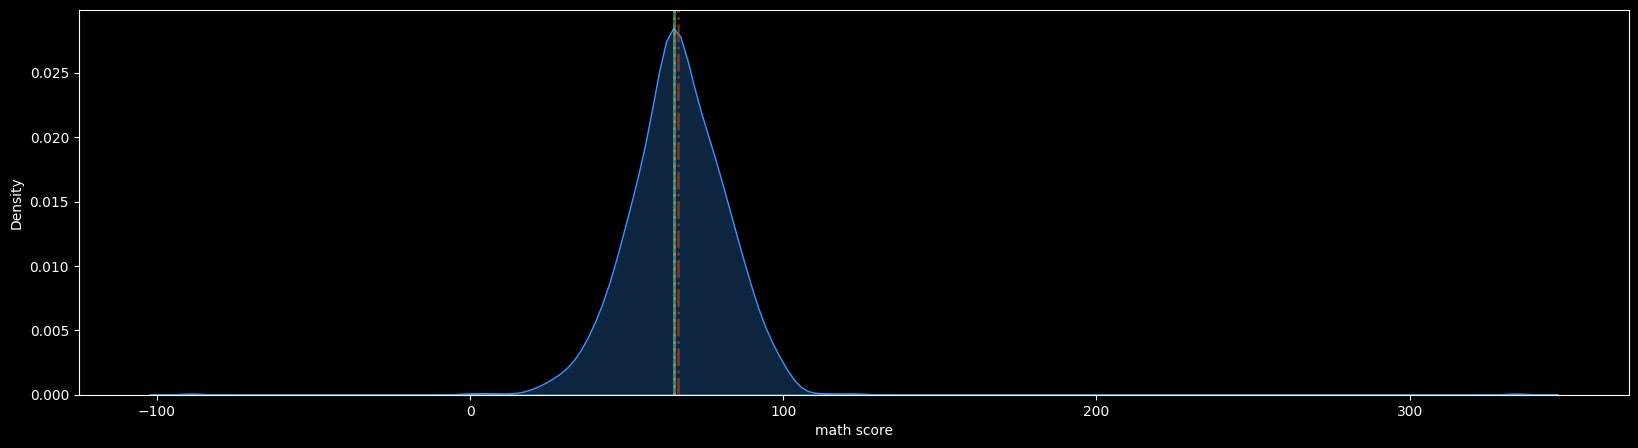

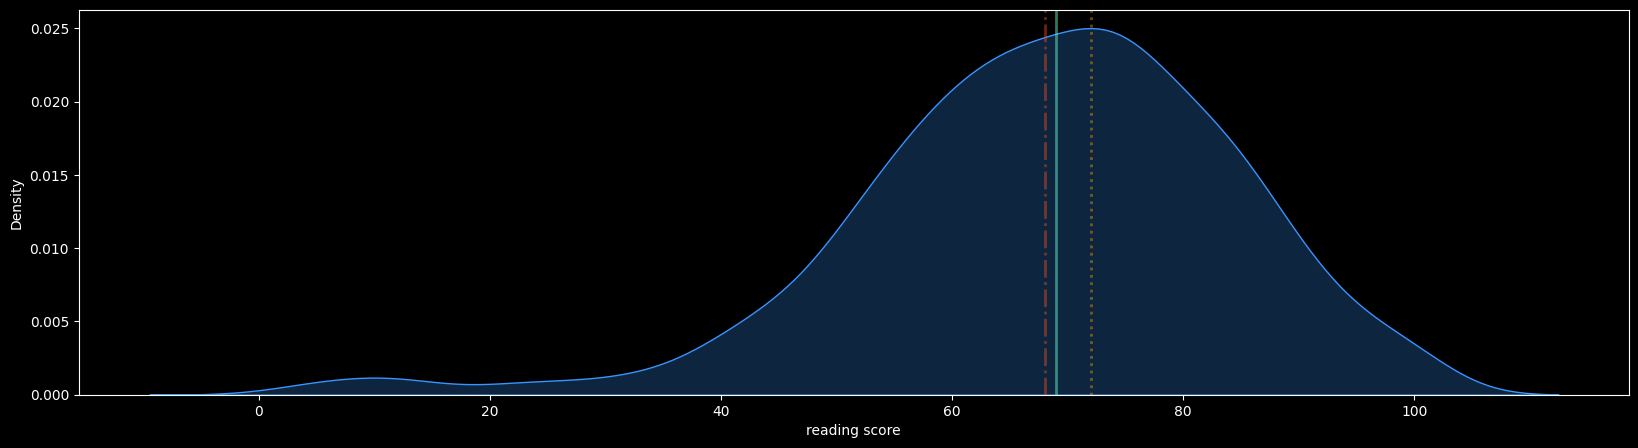

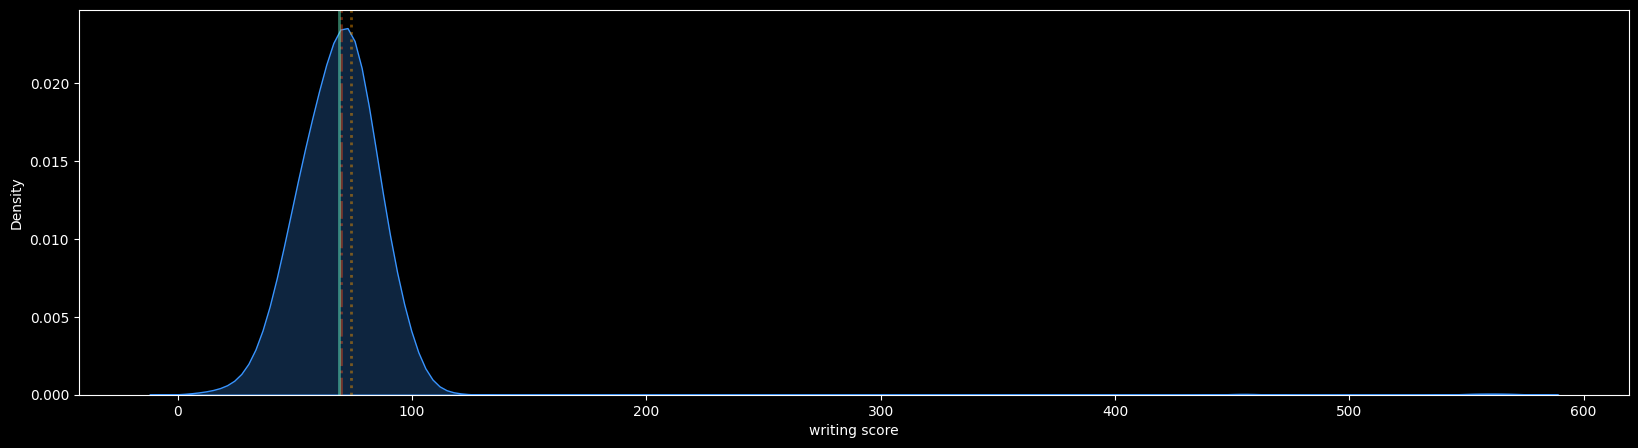

In [ ]:
for col in numeric_df.columns:
    plt.figure(figsize=(20, 5))
    sns.kdeplot(df[col], color="#3894FF77", label=col, fill=True)
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().mean()
    min = df[col].min()
    max = df[col].max()

    plt.axvline(
        mean, color="#E74B1977", linestyle="-.", linewidth=2, label=f"Mean: {mean:.2f}"
    )
    plt.axvline(
        median,
        color="#69FCCB77",
        linestyle="-",
        linewidth=2,
        label=f"Median: {median:.2f}",
    )
    plt.axvline(
        mode, color="#F2940077", linestyle=":", linewidth=2, label=f"Mode: {mode:.2f}"
    )

In [ ]:
mean_df = numeric_df.mean()
median_df = numeric_df.median()
mode_df = numeric_df.mode().mean()
std_df = numeric_df.std()
z_score = (numeric_df - mean_df) / std_df

In [37]:
summary_df = pd.DataFrame(
    {"Mean": mean_df, "Median": median_df, "Mode": mode_df, "Std Dev": std_df}
)

summary_df = summary_df[["Mean", "Median", "Mode", "Std Dev"]]

summary_df

,Mean,Median,Mode,Std Dev
math score,66.267,65.0,65,17.884394
reading score,68.014,69.0,72,16.552516
writing score,69.528,69.0,74,29.433375


In [38]:
def detect_outliers_iqr(data):

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    return data[(data < lower_bound) | (data > upper_bound)]

In [39]:
print("IQR Outliers:")
outliers_iqr_counter = 0
for col in numeric_df:
    outliers_iqr = detect_outliers_iqr(df[col])

    if len(outliers_iqr) > 0:
        print(f"\t{col}: {list(outliers_iqr)}")
        outliers_iqr_counter += len(outliers_iqr)
    else:
        print("No outliers")
print("Total outliers: ", outliers_iqr_counter)

IQR Outliers:
	math score: [0, 27, 22, 28, 24, 27, 113, 123, -89, 26, 334, 19, 23, 8]
	reading score: [22, 22, 12, 12, 13, 14, 9, 8, 7, 6, 4, 3, 5, 6, 22, 11, 11, 12, 12, 17, 26, 23, 24, 24]
	writing score: [10, 22, 19, 112, 114, 455, 567, 15, 554, 23]
Total outliers:  48


In [40]:
def detect_outliers_zscore(data):
    mean = np.mean(data)
    std_dev = np.std(data)

    z_scores = (data - mean) / std_dev
    outliers = data[np.abs(z_scores) > 3]

    return outliers

In [41]:
print("Z Score Outliers:")
outliers_z_score_counter = 0
for col in numeric_df:
    outliers_z_score = detect_outliers_zscore(df[col])

    if len(outliers_z_score) > 0:
        outliers_iqr_counter += len(outliers_z_score)
        print(f"\t{col}: {list(outliers_z_score)}")
    else:
        print("No outliers")

print("Total outliers: ", outliers_iqr_counter)

Z Score Outliers:
	math score: [0, 123, -89, 334, 8]
	reading score: [12, 12, 13, 14, 9, 8, 7, 6, 4, 3, 5, 6, 11, 11, 12, 12, 17]
	writing score: [455, 567, 554]
Total outliers:  73


In [42]:
from sklearn.preprocessing import StandardScaler


def detect_outliers_standard_scaler(data, threshold=3):
    data = data.values.reshape(-1, 1)

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    outlier_mask = (scaled_data.flatten() < -threshold) | (
        scaled_data.flatten() > threshold
    )

    outliers = data[outlier_mask].flatten()

    return outliers.tolist()

In [43]:
print("Standard Scalar Outliers:")
outliers_std_counter = 0
for col in numeric_df:
    outliers_std = detect_outliers_standard_scaler(df[col])

    if len(outliers_std) > 0:
        outliers_std_counter += len(outliers_std)
        print(f"\t{col}: {list(outliers_std)}")
    else:
        print(f"\t{col}: No outliers")

print("Total outliers: ", outliers_iqr_counter)

Standard Scalar Outliers:
	math score: [0, 123, -89, 334, 8]
	reading score: [12, 12, 13, 14, 9, 8, 7, 6, 4, 3, 5, 6, 11, 11, 12, 12, 17]
	writing score: [455, 567, 554]
Total outliers:  73


In [44]:
for col in numeric_df.columns:
    mean = np.mean(df[col])
    std = np.std(df[col])

    z_scores = (df[col] - mean) / std

    df = df[np.abs(z_scores) < 3]
    df[col] = df[col].clip(lower=0, upper=100)

In [45]:
for col in numeric_df.columns:
    print(df[col].min(), df[col].max())

19 100
22 100
15 100


In [46]:
df.describe()

,math score,reading score,writing score
count,976.000000,976.000000,976.000000
mean,66.169057,69.014344,68.149590
std,14.701373,14.718061,15.122615
min,19.000000,22.000000,15.000000
25%,57.000000,59.000000,57.000000
50%,65.000000,70.000000,69.000000
75%,76.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


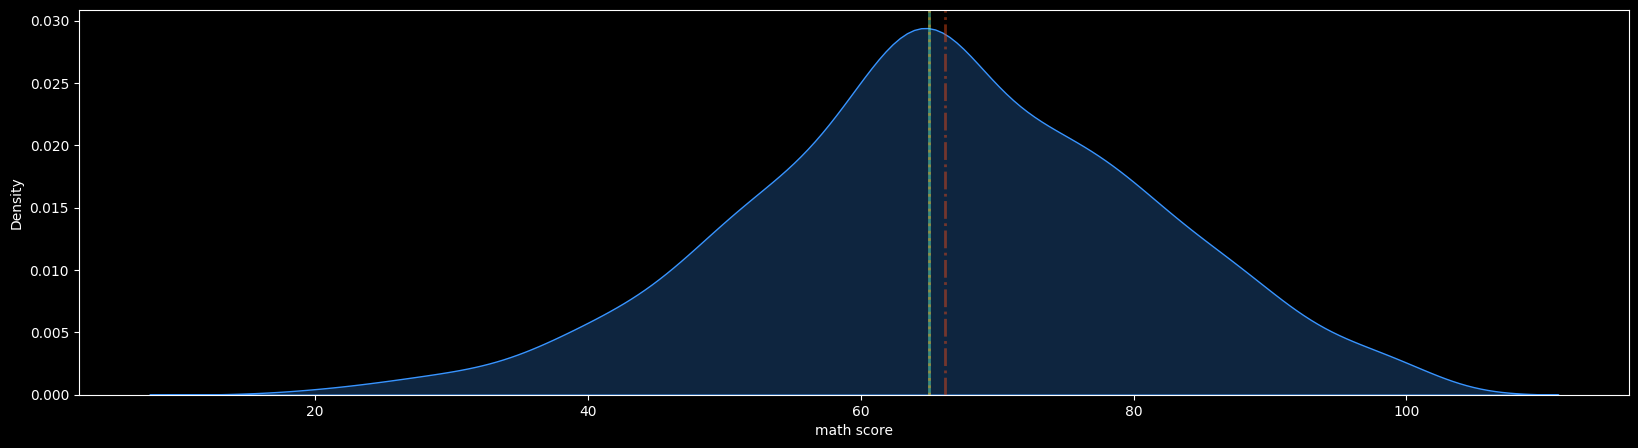

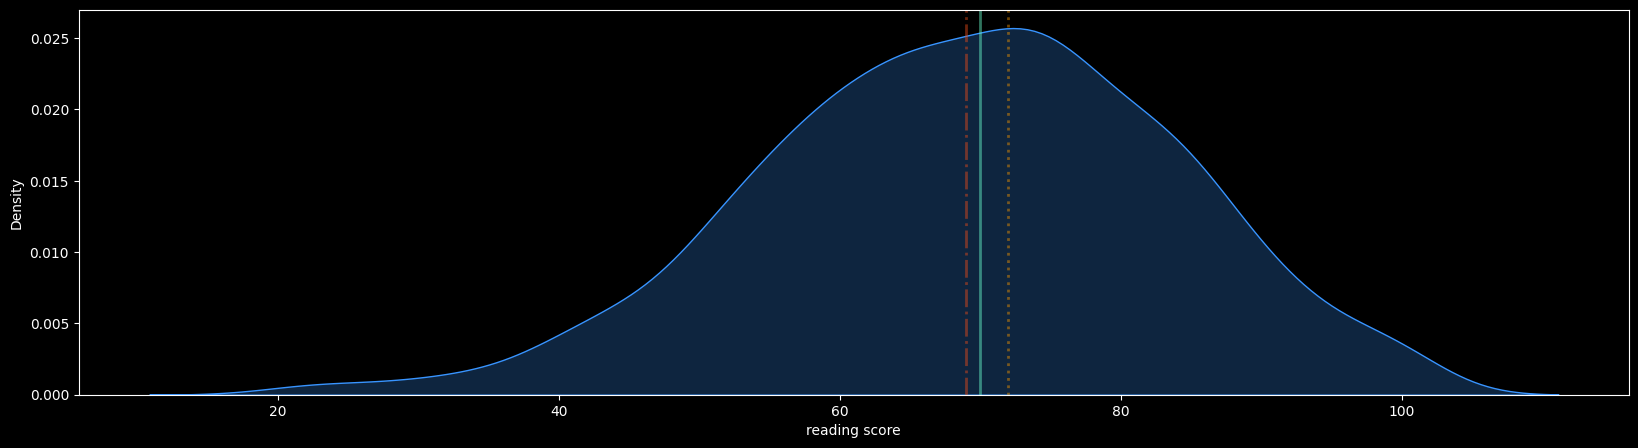

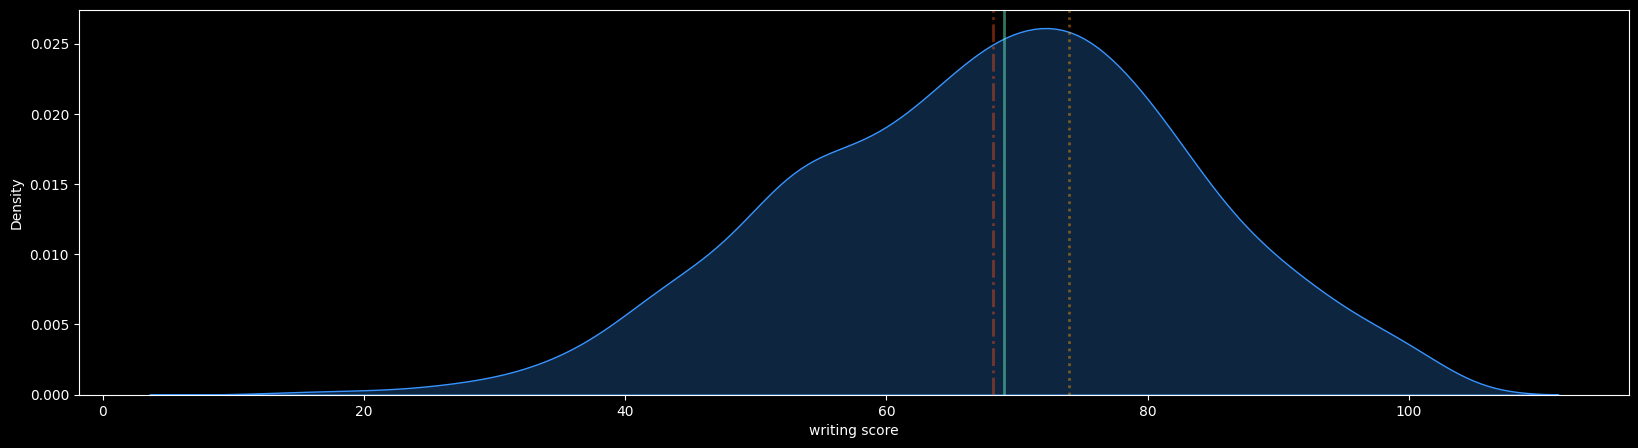

In [47]:
for col in numeric_df.columns:
    plt.figure(figsize=(20, 5))
    sns.kdeplot(df[col], color="#3894FF77", label=col, fill=True)
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    min = df[col].min()
    max = df[col].max()

    plt.axvline(
        mean, color="#E74B1977", linestyle="-.", linewidth=2, label=f"Mean: {mean:.2f}"
    )
    plt.axvline(
        median,
        color="#69FCCB77",
        linestyle="-",
        linewidth=2,
        label=f"Median: {median:.2f}",
    )
    plt.axvline(
        mode, color="#F2940077", linestyle=":", linewidth=2, label=f"Mode: {mode:.2f}"
    )

In [48]:
pd.DataFrame(df.dtypes.reset_index())

,index,0
0,gender,object
1,race/ethnicity,object
2,parental level of education,object
3,lunch,object
4,test preparation course,object
5,math score,int64
6,reading score,int64
7,writing score,int64


In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["parental level of education"] = label_encoder.fit_transform(
    df["parental level of education"]
)

In [50]:
categorical_cols = ["gender", "lunch", "test preparation course", "race/ethnicity"]

df = pd.get_dummies(
    df,
    columns=categorical_cols,
)
df[df.select_dtypes(include="number").columns] = df.select_dtypes(
    include="number"
).astype(int)
df

,parental level of education,math score,reading score,writing score,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,72,72,74,True,False,False,True,False,True,False,True,False,False,False
1,4,69,90,88,True,False,False,True,True,False,False,False,True,False,False
2,3,90,95,93,True,False,False,True,False,True,False,True,False,False,False
3,0,47,57,44,False,True,True,False,False,True,True,False,False,False,False
4,4,76,78,75,False,True,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,88,99,95,True,False,False,True,True,False,False,False,False,False,True
996,2,62,55,55,False,True,True,False,False,True,False,False,True,False,False
997,2,59,71,65,True,False,True,False,True,False,False,False,True,False,False
998,4,68,78,77,True,False,False,True,True,False,False,False,False,True,False


In [51]:
from sklearn.preprocessing import StandardScaler

standard_scalar = StandardScaler()
standardized_data = standard_scalar.fit_transform(df.values)
standardized_df = pd.DataFrame(np.round(standardized_data, 2), columns=df.columns)
standardized_df

,parental level of education,math score,reading score,writing score,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,-0.81,0.40,0.20,0.39,0.97,-0.97,-0.75,0.75,-0.75,0.75,-0.31,2.07,-0.69,-0.59,-0.41
1,0.83,0.19,1.43,1.31,0.97,-0.97,-0.75,0.75,1.33,-1.33,-0.31,-0.48,1.46,-0.59,-0.41
2,0.28,1.62,1.77,1.64,0.97,-0.97,-0.75,0.75,-0.75,0.75,-0.31,2.07,-0.69,-0.59,-0.41
3,-1.36,-1.30,-0.82,-1.60,-1.03,1.03,1.34,-1.34,-0.75,0.75,3.22,-0.48,-0.69,-0.59,-0.41
4,0.83,0.67,0.61,0.45,-1.03,1.03,-0.75,0.75,-0.75,0.75,-0.31,-0.48,1.46,-0.59,-0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,0.28,1.49,2.04,1.78,0.97,-0.97,-0.75,0.75,1.33,-1.33,-0.31,-0.48,-0.69,-0.59,2.46
972,-0.26,-0.28,-0.95,-0.87,-1.03,1.03,1.34,-1.34,-0.75,0.75,-0.31,-0.48,1.46,-0.59,-0.41
973,-0.26,-0.49,0.13,-0.21,0.97,-0.97,1.34,-1.34,1.33,-1.33,-0.31,-0.48,1.46,-0.59,-0.41
974,0.83,0.12,0.61,0.59,0.97,-0.97,-0.75,0.75,1.33,-1.33,-0.31,-0.48,-0.69,1.69,-0.41


In [52]:
from sklearn.preprocessing import MinMaxScaler

normalized_scalar = MinMaxScaler()
normalized_data = normalized_scalar.fit_transform(df.values)
normalized_df = pd.DataFrame(np.round(normalized_data, 2), columns=df.columns)
normalized_df

,parental level of education,math score,reading score,writing score,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0.2,0.65,0.64,0.69,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.8,0.62,0.87,0.86,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.88,0.94,0.92,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.35,0.45,0.34,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.8,0.70,0.72,0.71,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,0.6,0.85,0.99,0.94,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
972,0.4,0.53,0.42,0.47,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
973,0.4,0.49,0.63,0.59,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
974,0.8,0.60,0.72,0.73,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
